In [1]:
from class_magnesium import *

### Random Forest Classifier

Feature reduction: 361 -> 129


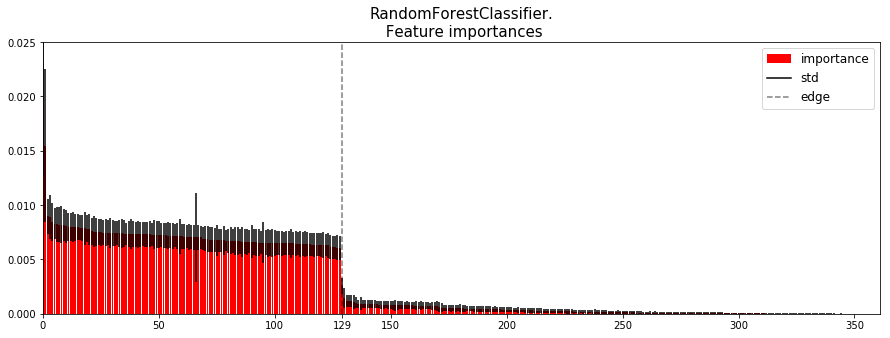

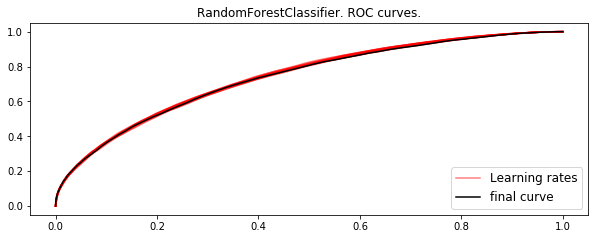

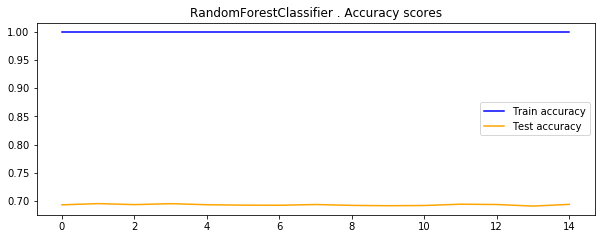

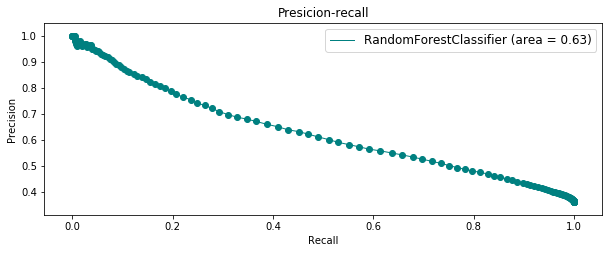

Average score: 0.693103128191
Feature reduction: 361 -> 130

Average score: 0.644769691915


0.64476969191537448

In [11]:
rfc = Magnesium("set_minresol_N_7.csv", with_groups = False)
rfc.compute(n_splits = 15)

rfc_gr = Magnesium("set_minresol_N_7.csv")
rfc_gr.compute(n_splits = 15, plots = False)

### LinearDiscriminantAnalysis

C:\Users\tikho\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


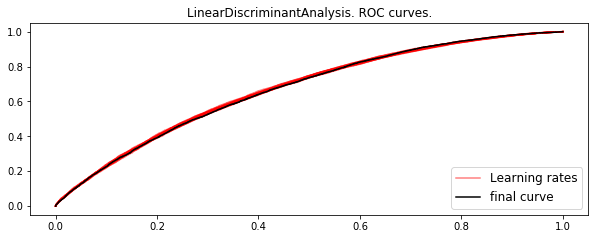

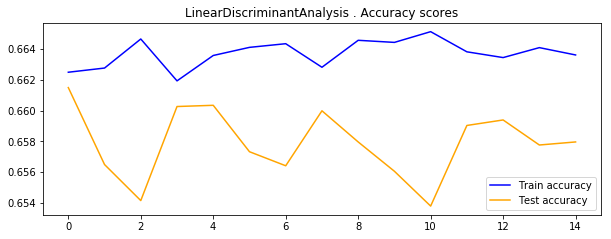

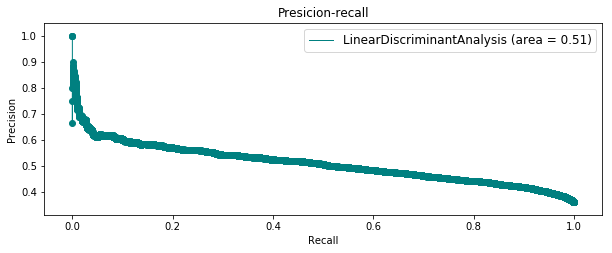

Average score: 0.65788810651


C:\Users\tikho\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")



Average score: 0.641532482278


0.64153248227755555

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_svd = Magnesium("set_minresol_N_7.csv", LinearDiscriminantAnalysis(solver = 'svd', tol = 0.06), with_groups = False)
lda_svd.compute(n_splits = 15,reduce_features = False)

lda_svd_gr = Magnesium("set_minresol_N_7.csv", LinearDiscriminantAnalysis(solver = 'svd', tol = 0.06))
lda_svd_gr.compute(n_splits = 15,reduce_features = False, plots = False)

### QDA

C:\Users\tikho\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


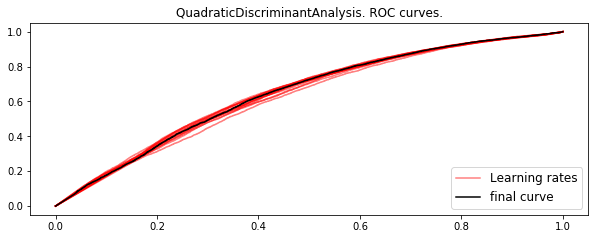

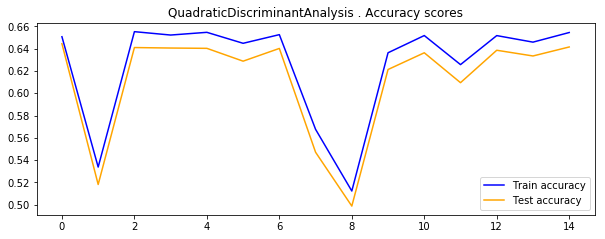

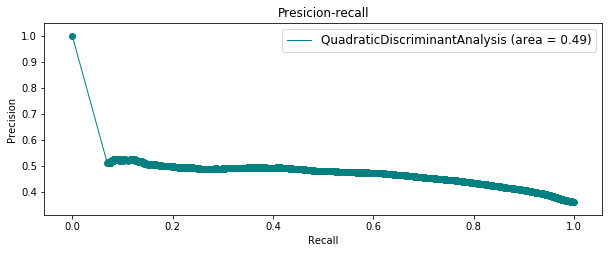

Average score: 0.611971728262


C:\Users\tikho\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Average score: 0.609861698963


0.60986169896292097

In [13]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = Magnesium("set_minresol_N_7.csv", QuadraticDiscriminantAnalysis(), with_groups = False)
qda.compute(n_splits = 15,reduce_features = False)

qda_gr = Magnesium("set_minresol_N_7.csv", QuadraticDiscriminantAnalysis())
qda_gr.compute(n_splits = 15,reduce_features = False, plots = False)

### Xgboost

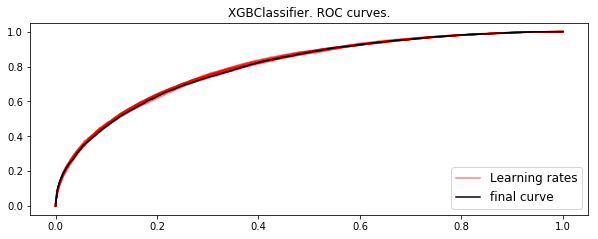

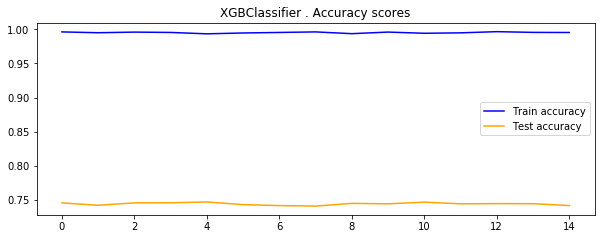

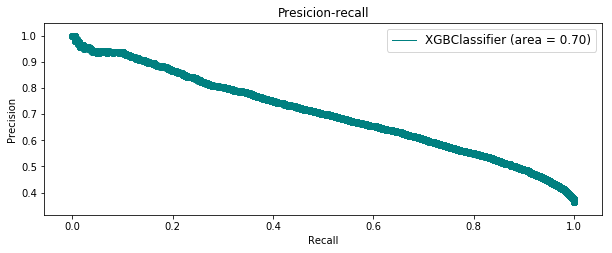

Average score: 0.744246860538

Average score: 0.676412776187


0.67641277618683626

In [14]:
import xgboost

xgb = Magnesium("set_minresol_N_7.csv", xgboost.XGBClassifier(max_depth = 10, n_estimators = 300, learning_rate = 0.09), 
                with_groups = False)
xgb.compute(n_splits = 15,reduce_features = False)

xgb_gr = Magnesium("set_minresol_N_7.csv", xgboost.XGBClassifier(max_depth = 10, n_estimators = 300, learning_rate = 0.09))
xgb_gr.compute(n_splits = 15,reduce_features = False, plots = False)

### Adaboost

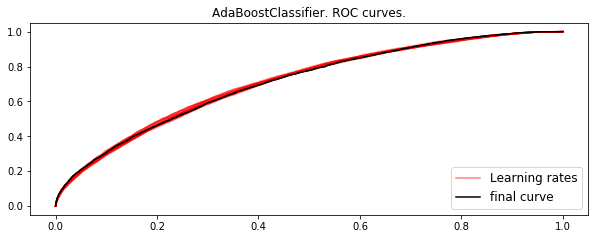

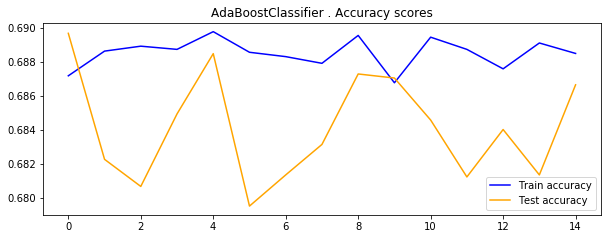

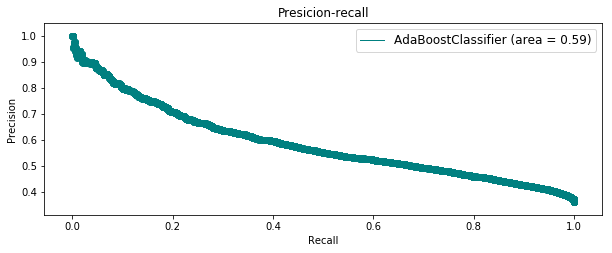

Average score: 0.684138918725

Average score: 0.628743844954


0.62874384495353641

In [15]:
from sklearn.ensemble import AdaBoostClassifier

ada = Magnesium("set_minresol_N_7.csv", AdaBoostClassifier(), with_groups = False)
ada.compute(n_splits = 15,reduce_features = False)

ada_gr = Magnesium("set_minresol_N_7.csv", AdaBoostClassifier())
ada_gr.compute(n_splits = 15,reduce_features = False, plots = False)

### General plot

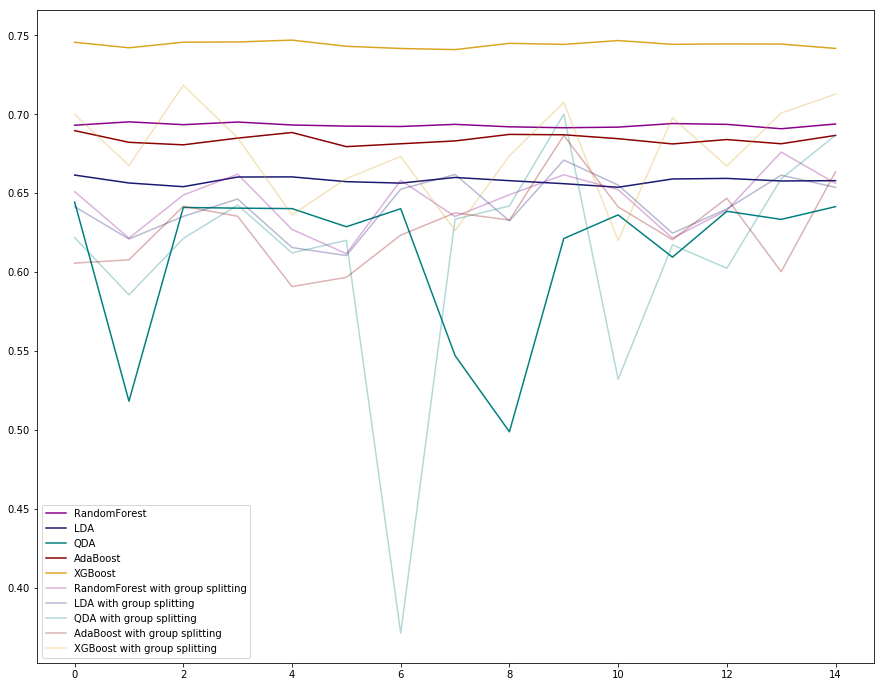

In [22]:
ax = plt.figure(figsize = (15, 12)).add_subplot(111)
ax.plot(list(range(15)), rfc.test_score, color = 'darkmagenta', label = 'RandomForest')
ax.plot(list(range(15)), lda_svd.test_score, color = 'midnightblue', label = 'LDA')
ax.plot(list(range(15)), qda.test_score, color = 'teal', label = 'QDA')
ax.plot(list(range(15)), ada.test_score, color = 'darkred', label = 'AdaBoost')
ax.plot(list(range(15)), xgb.test_score, color = 'goldenrod', label = 'XGBoost')

ax.plot(list(range(15)), rfc_gr.test_score, color = 'darkmagenta', label = 'RandomForest with group splitting', alpha = 0.3)
ax.plot(list(range(15)), lda_svd_gr.test_score, color = 'midnightblue', label = 'LDA with group splitting', alpha = 0.3)
ax.plot(list(range(15)), qda_gr.test_score, color = 'teal', label = 'QDA with group splitting', alpha = 0.3)
ax.plot(list(range(15)), ada_gr.test_score, color = 'darkred', label = 'AdaBoost with group splitting', alpha = 0.3)
ax.plot(list(range(15)), xgb_gr.test_score, color = 'goldenrod', label = 'XGBoost with group splitting', alpha = 0.3)
ax.legend()
plt.show()